# SLM calibration preprocessing

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib widget

path = "1pol_straight_slm_2/"
filename = "mes_1pol"
MAX = 2**12

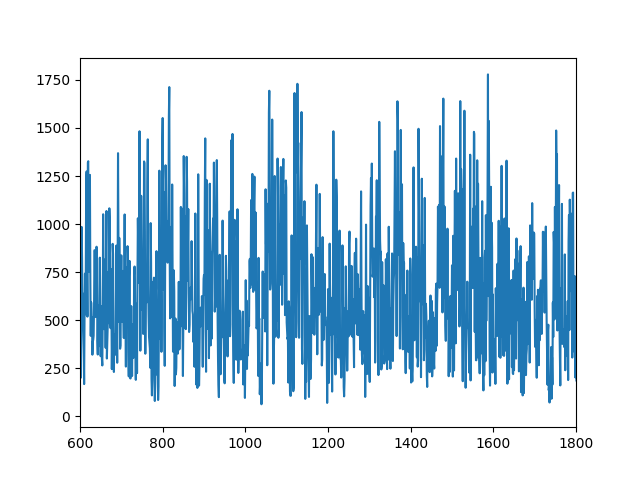

In [2]:
img = Image.open(path+filename+'0.tif')
npim = np.asarray(img)
plt.figure()
# print(npim.max())
# plt.imshow(npim,vmin=0, vmax = 2**16,cmap='grey')
plt.plot(npim[1700,:])
plt.xlim([600,1800])
# plt.colorbar(min=0,max=2**16)
plt.show()

height, width = npim.shape


In [3]:
N = 256
video = np.zeros((height, width, N*2),dtype=np.uint16)

i = 0
for i in range(N):
    video[:,:,i] = np.asarray(Image.open(path+filename+str(i)+'.tif'))

i = 0
for i in range(N):
    video[:,:,N-1+i] = np.asarray(Image.open(path+filename+str(1000+N-1-i)+'.tif'))



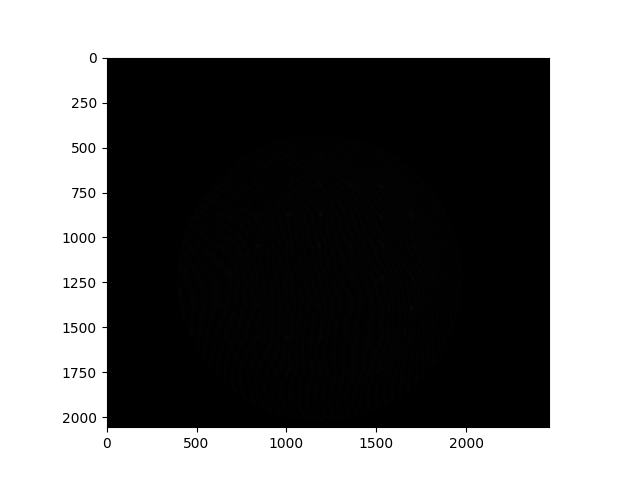

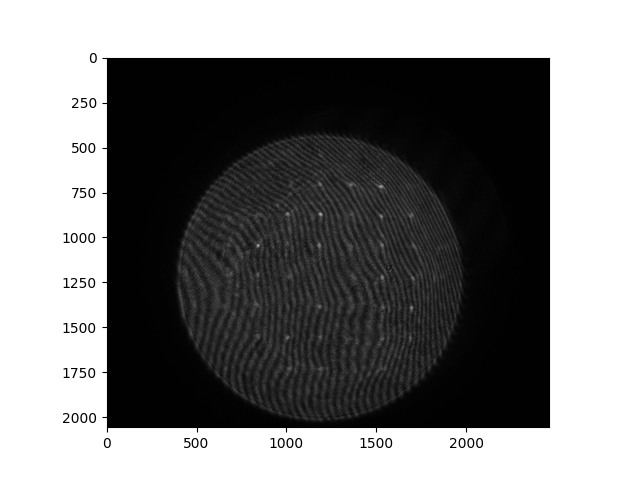

In [4]:
# video1 = video<<4 # bit shift to 16 bits instead of 12

plt.figure()
plt.imshow(video[:,:,0],vmin=0, vmax = 2**16,cmap='grey')
plt.figure()
plt.imshow(video[:,:,0]<<4,vmin=0, vmax = 2**16,cmap='grey')


In [5]:
# video = (video-video.min())/(video.max()-video.min())*2**16

video1 = video<<4

In [6]:
N = 256

i = 0
for i in range(N):
    cv2.imwrite(path+filename+str(i)+'.png', video1[:,:,i])

i = 0
for i in range(N):
    cv2.imwrite(path+filename+str(1000+N-1-i)+'.png', video1[:,:,N-1+i])


## Video file

In [17]:
height, width, N = video.shape

# Define video writer
fps = 100  # frames per second
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID' for .avi
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height), isColor=False)

for i in range(N):
    frame = video[:, :, i]
    frame_uint8 = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    out.write(frame_uint8)

out.release()
cv2.destroyAllWindows()

## Downscaling